# DAT 402 Project 2

#### I. Problem Introduction and Dataset Overview
    Introduce the problem, describe the dataset, and define the prediction goal.

#### II. Dataset Acquisition and Exploratory Data Analysis (EDA)
    Load and clean the dataset, perform exploratory data analysis, and visualize distributions.

#### III. Unsupervised Learning: Clustering or Dimensionality Reduction
    Apply K-means clustering or PCA to explore patterns and visualize the results.

#### IV. Supervised Learning: Model Training and Hyperparameter Tuning
    Split data, train models (including ANN), and optimize with hyperparameter tuning.

#### V. Model Evaluation and Discussion of Results
    Evaluate models, visualize performance, and discuss the implications and limitations.


In [49]:
# Importing necassary libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import mplfinance as mpf
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### I. Problem Introduction and Dataset Overview

#### Introduction:
In this project, we want to forecast the **daily trading volume** of **Nvidia Corporation (NVDA)** for the year **2026**. Nvidia is a leading technology company in the world market, in which several of its products and technologies are concerned with GPU and artificial intelligence. During the last twenty years, Nvidia has been going through rapid growth not only concerning stock price but also in terms of the volume of trades, hence making the company very important in the stock market.

The importance of the correct forecast of trading volume cannot be overstated for investors, traders, and market analysts, as it depicts market liquidity, investor sentiment, and volatility of prices. We will try to make a meaningful forecast of the trading volume of Nvidia and, by so doing, provide some meaningful insight which would help to optimize the trading strategy and hence make well-informed investment decisions.

#### Goal:
The primary goal of this project is to predict Nvidia’s **daily traded volume** for the year **2026** based on historical stock market data from 2004 to 2023. By leveraging machine learning techniques, we will model the relationships between features like **Open**, **High**, **Low**, **Close**, and **Volume**, along with engineered features, to generate accurate volume predictions.

#### Dataset Overview:
For this analysis, we utilize a dataset that spans from **January 2, 2004** to **December 29, 2023**, containing over **5000 observations** of Nvidia's daily stock data. The dataset includes the following features:

- **Date**: The trading date.
- **Open**: The stock price at the start of the trading day.
- **High**: The highest price Nvidia's stock reached on the given day.
- **Low**: The lowest price Nvidia's stock reached on the given day.
- **Close**: The closing stock price at the end of the trading day.
- **Volume**: The total number of shares traded during the day (target variable).

Our objective is to utilize historical trends and relationships within the dataset to forecast the **Volume** traded for each day in **2026**. This dataset provides a rich source of information, allowing us to apply various machine learning models to tackle the prediction problem.

#### Dataset Source:
- **Link to Dataset**: [Kaggle - Nvidia Daily Stock Price Data](https://www.kaggle.com/datasets/jvanark/nvidia-daily-stock-price-data)

#### II. Dataset Acquisition and Exploratory Data Analysis (EDA)

The day-to-day analysis for the stock price of Nvidia is from **January 2, 2004, to December 29, 2023**. I am focusing on the prediction of the **trading volume** of the year 2026 based on the trends of the past. The most significant features in the dataset include **Open**, **High**, **Low**, **Close**, and **Volume**, which is the target variable.

**Loading and Cleaning the Data:**
We performed the following steps:
1. **Handling Missing Data**: Checked for and removed any missing values.
2. **Feature Engineering**: Engineered features such as **moving averages**, **volatility**, and **correlation** to give us more insight into the trends and fluctuations in stock trading.

In [39]:
nvidia_data = pd.read_csv('nvidia_stock_prices.csv')

# Converting 'Date' column to datetime format
nvidia_data['Date'] = pd.to_datetime(nvidia_data['Date'])
nvidia_data.set_index('Date', inplace=True)

# Dropping rows with missing data
nvidia_cleaned = nvidia_data.dropna()

# Feature engineering
nvidia_cleaned['30_Day_MA'] = nvidia_cleaned['Close'].rolling(window=30).mean()
nvidia_cleaned['30_Day_Volatility'] = nvidia_cleaned['Close'].rolling(window=30).std()
nvidia_cleaned['Rolling_Correlation'] = nvidia_cleaned['Open'].rolling(window=30).corr(nvidia_cleaned['Volume'])

# Display cleaned dataset
nvidia_cleaned.info()

# Descriptive statistics
print("\nDescriptive statistics of the dataset:")
display(nvidia_cleaned.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2004-01-02 to 2023-12-29
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Open                 5033 non-null   float64
 1   High                 5033 non-null   float64
 2   Low                  5033 non-null   float64
 3   Close                5033 non-null   float64
 4   Volume               5033 non-null   int64  
 5   30_Day_MA            5004 non-null   float64
 6   30_Day_Volatility    5004 non-null   float64
 7   Rolling_Correlation  5004 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 353.9 KB

Descriptive statistics of the dataset:


,Open,High,Low,Close,Volume,30_Day_MA,30_Day_Volatility,Rolling_Correlation
count,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03,5004.000000,5004.000000,5004.000000
mean,5.214671,5.308604,5.117086,5.217039,5.587962e+08,5.106472,0.330571,-0.009225
std,9.643976,9.811276,9.465058,9.644928,3.363408e+08,9.355090,0.681263,0.304970
min,0.080583,0.083917,0.077500,0.078583,4.564400e+07,0.102280,0.003986,-0.800989
25%,0.344000,0.349000,0.336500,0.343250,3.482920e+08,0.347802,0.016069,-0.226733
50%,0.544000,0.552750,0.532500,0.542000,4.910920e+08,0.538243,0.033356,-0.015627
75%,5.233750,5.296500,5.125000,5.229000,6.816760e+08,5.147125,0.250634,0.202985
max,50.216000,50.548000,49.411999,50.409000,5.088948e+09,48.266867,5.410589,0.858572


In this project, we focus on trading volume prediction, so our exploratory analysis will provide deeper insights into the Volume trends and relationships with other features. Here are the new EDA techniques applied:

**1. Cumulative Volume Over Time:**
We begin by visualizing the cumulative sum of Nvidia’s trading volume over time. This helps us understand how Nvidia’s overall trading volume has evolved over the years and identify periods of rapid increase.

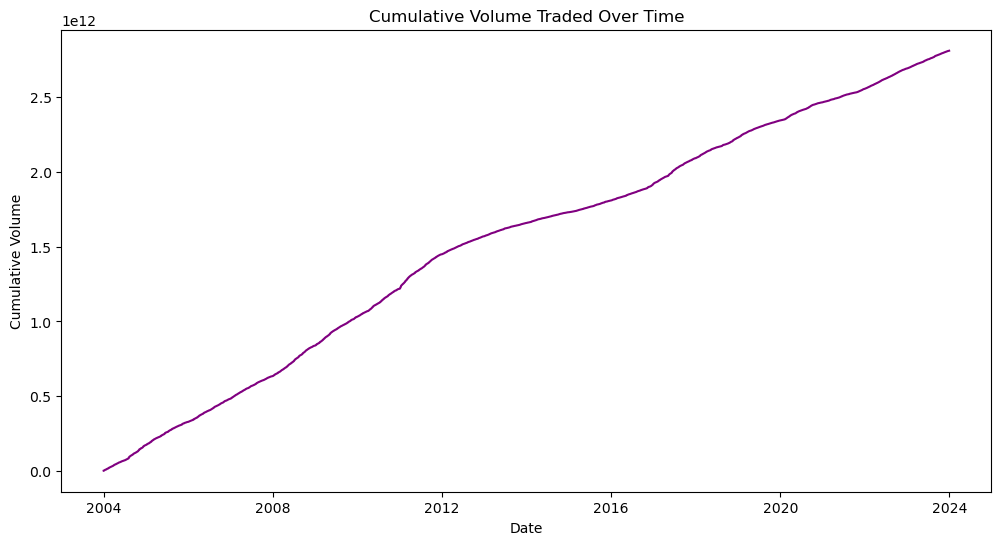

In [40]:
# Cumulative sum of volume over time
nvidia_cleaned['Cumulative_Volume'] = nvidia_cleaned['Volume'].cumsum()

# Plot cumulative volume over time
plt.figure(figsize=(12, 6))
plt.plot(nvidia_cleaned.index, nvidia_cleaned['Cumulative_Volume'], label='Cumulative Volume', color='purple')
plt.title('Cumulative Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Volume')
plt.show()


**Key Insights:**

This plot of cumulative trading volumes over time for Nvidia shows an almost steadily upward linear trend. The consistent upward trend shows that trading of the stock of Nvidia has seen reasonably high activity over the years with no major dips in the trading volumes. Most noticeably, the period post-2020 is one with a steeper ascend-an observation likely to correspond to the increase in the prominence of Nvidia in AI and GPU markets.


**2. Box Plot of Volume by Year:**
To explore the annual distribution of trading volume, we created a box plot grouped by year. This will help detect any changes in trading volume patterns over time and spot outliers or extreme volume spikes.

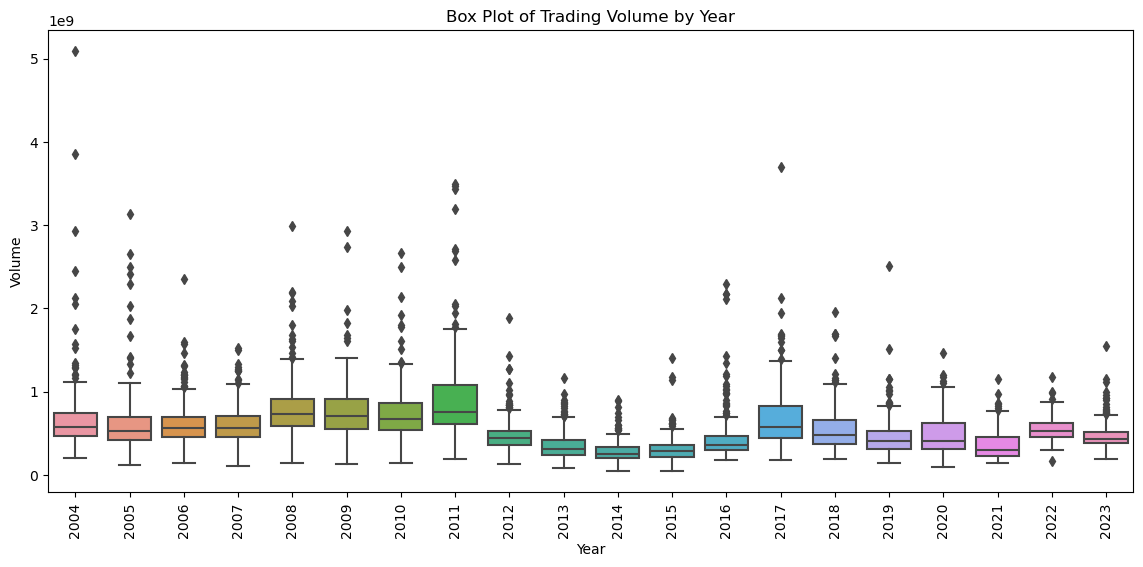

In [41]:
# Extract year from the 'Date' index
nvidia_cleaned['Year'] = nvidia_cleaned.index.year

# Plot box plot of Volume by year
plt.figure(figsize=(14, 6))
sns.boxplot(x='Year', y='Volume', data=nvidia_cleaned)
plt.title('Box Plot of Trading Volume by Year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Volume')
plt.show()

**Key Insights:**

The box plot depicts the stability of trading volumes throughout the years. There are many noticeable outliers in some years, like in 2008, 2016, and 2020. These are representations of extremely high trading activities during those periods and could correspond to major financial events or significant developments in Nvidia's technology offering. In fact, through to 2020, the consistent growth of the interquartile range from 2004 indicates expansions in trading volumes over time.

**3. Lagged Volume Autocorrelation:**
We examined the autocorrelation of trading volume using lag plots. This helps understand if there’s any predictable pattern in the volume over time and whether past trading volumes are predictive of future ones.

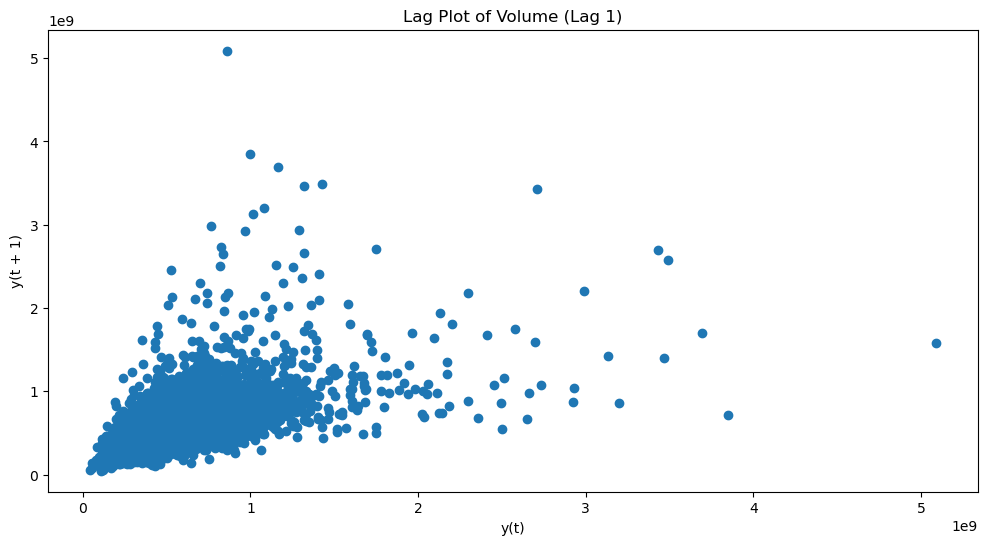

In [42]:
# Plot lagged autocorrelation for Volume
plt.figure(figsize=(12, 6))
lag_plot(nvidia_cleaned['Volume'], lag=1)
plt.title('Lag Plot of Volume (Lag 1)')
plt.show()


**Key Insights:**

This lag plot suggests there is some autocorrelation in trading volumes, since the points cluster near the origin. In other words, past trading volumes can give us some indication of future volumes. The more scattered distribution of points further out indicates that with time the relationship becomes weaker and weaker. This would imply that recent trends in trading volume, while useful for a short-term forecast of volume, are less useful for longer-term volume prediction.

**4. Rolling Mean and Standard Deviation of Volume:**
We calculated and visualized the rolling mean and rolling standard deviation of Volume over time to detect periods of high volatility or increased trading activity.

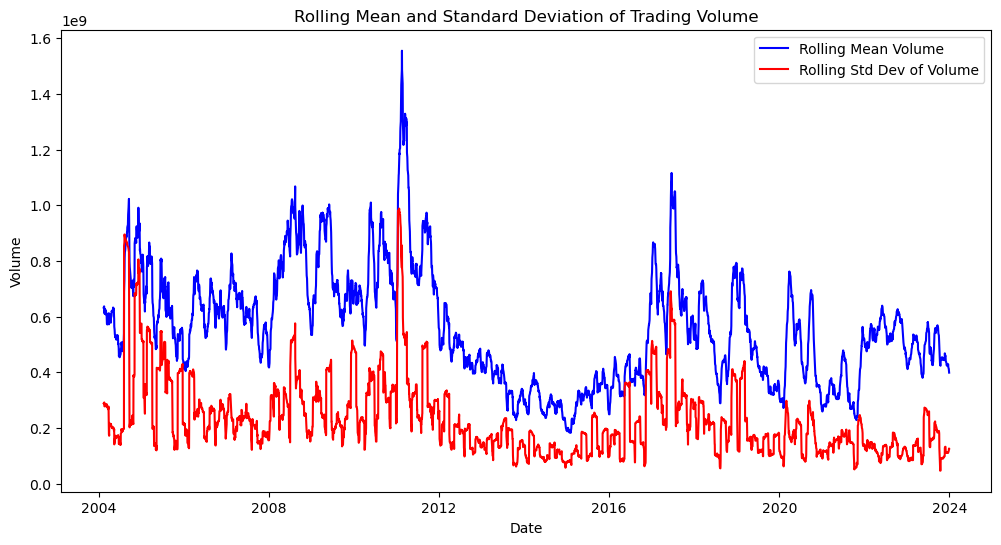

In [43]:
# Rolling statistics for Volume
nvidia_cleaned['Rolling_Mean_Volume'] = nvidia_cleaned['Volume'].rolling(window=30).mean()
nvidia_cleaned['Rolling_Std_Volume'] = nvidia_cleaned['Volume'].rolling(window=30).std()

# Plot rolling mean and standard deviation of Volume
plt.figure(figsize=(12, 6))
plt.plot(nvidia_cleaned.index, nvidia_cleaned['Rolling_Mean_Volume'], label='Rolling Mean Volume', color='blue')
plt.plot(nvidia_cleaned.index, nvidia_cleaned['Rolling_Std_Volume'], label='Rolling Std Dev of Volume', color='red')
plt.title('Rolling Mean and Standard Deviation of Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


**Key Insights:**

The moving average and standard deviation in trading volume pinpoint the periods of high and low volatility in the market. For instance, there is a huge spike in both figures around 2008, which most probably reflects the global financial crisis. Further, there are periods of increased activity, such as in 2016 and 2020, that can be related to Nvidia's breakthroughs and wider market trends. The rolling standard deviation, in particular, denotes periods of high volatility when trading volumes changed sharply within small spans of time.


**5. Seasonality in Volume:**
We checked for seasonal patterns in the trading volume by creating monthly aggregates. This helps us see if there are specific times of the year where trading activity spikes.



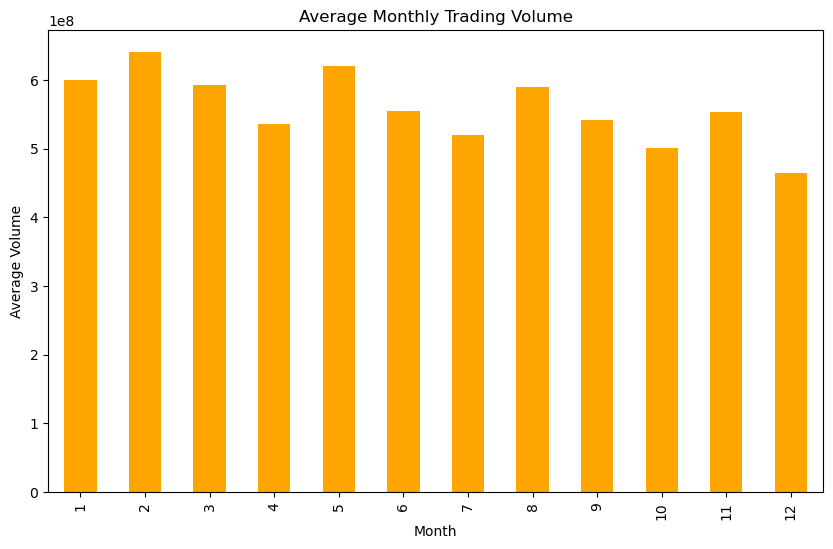

In [44]:
# Group by month to check for seasonality in Volume
nvidia_cleaned['Month'] = nvidia_cleaned.index.month
monthly_volume = nvidia_cleaned.groupby('Month')['Volume'].mean()

# Plot seasonality in Volume
plt.figure(figsize=(10, 6))
monthly_volume.plot(kind='bar', color='orange')
plt.title('Average Monthly Trading Volume')
plt.xlabel('Month')
plt.ylabel('Average Volume')
plt.show()


This bar plot shows the seasonality in trading volume. Clearly, the months of February and May have the biggest volumes, while summer and late fall periods are less busy. That may have something to do with general market cycles or company-specific events such as earnings reports or product releases. This pattern could help in forecasting periods of higher or lower volumes over the year.


**6. Scatter Plot: Volume vs. Volatility:**
Finally, we explored the relationship between Volume and Volatility using a scatter plot. This can help us see if higher volatility is associated with higher trading activity.

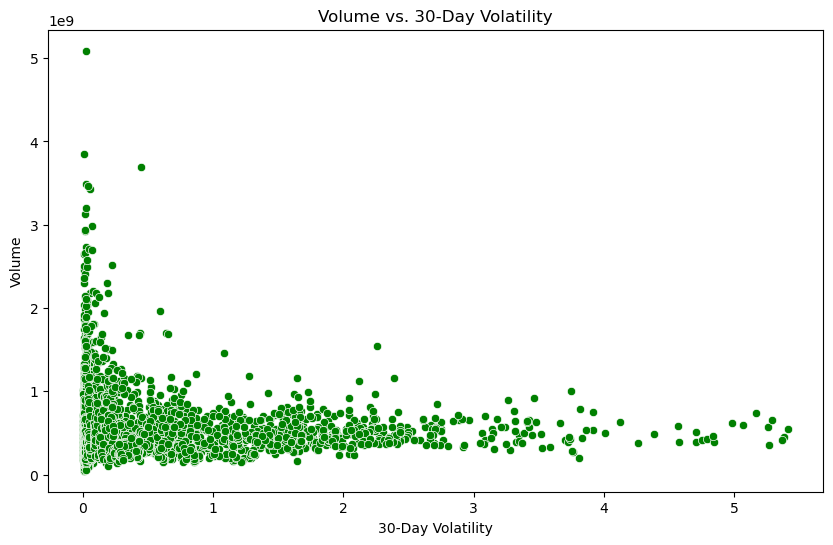

In [45]:
# Scatter plot of Volume vs. Volatility
plt.figure(figsize=(10, 6))
sns.scatterplot(x=nvidia_cleaned['30_Day_Volatility'], y=nvidia_cleaned['Volume'], color='green')
plt.title('Volume vs. 30-Day Volatility')
plt.xlabel('30-Day Volatility')
plt.ylabel('Volume')
plt.show()


This scatter plot depicts that higher volatility-the larger the movement in the price of a security-measured over a 30-day window is generally associated with higher trading volumes. The majority of data points congregate around low levels of volatility, but spikes in trading volume do occur at the moments of heightened volatility, showing that investors become busier during the times of turmoil or fluctuations in markets.



##### 7. **Scatter Plot: Volume vs. Price Change**:
To further explore the relationship between trading volume and stock price behavior, we calculate the **daily price change** and plot it against the **Volume**. This helps us understand if significant price movements lead to increased trading activity.

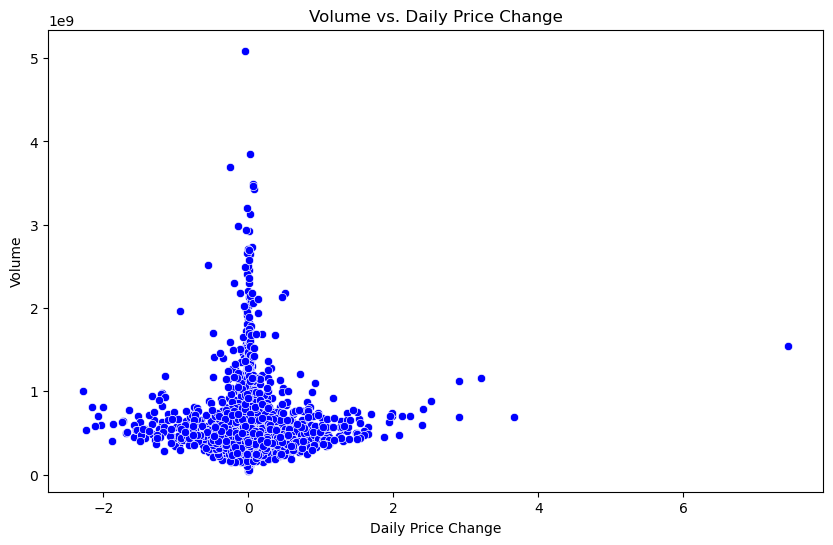

In [46]:
# Calculate daily price change (difference between closing prices)
nvidia_cleaned['Price_Change'] = nvidia_cleaned['Close'].diff()

# Plot Scatter plot of Volume vs. Price Change
plt.figure(figsize=(10, 6))
sns.scatterplot(x=nvidia_cleaned['Price_Change'], y=nvidia_cleaned['Volume'], color='blue')
plt.title('Volume vs. Daily Price Change')
plt.xlabel('Daily Price Change')
plt.ylabel('Volume')
plt.show()


This scatter plot displays the relationship between daily changes in prices and trading volume. Interestingly enough, large price changes of both positive and negative magnitudes are associated with high trading volumes-apparently, days of greater price movements create, in turn, more trading activity. The clustering near small price changes and moderate trading volumes suggests that most days see smaller fluctuations in price with average levels of trading activity.


##### 8. **Rolling Correlation Between Open Price and Volume**:
We compute the **rolling correlation** between the **Open** price and **Volume** over a 30-day window to observe how their relationship evolves over time. This can reveal periods where price and volume are strongly correlated or diverge.


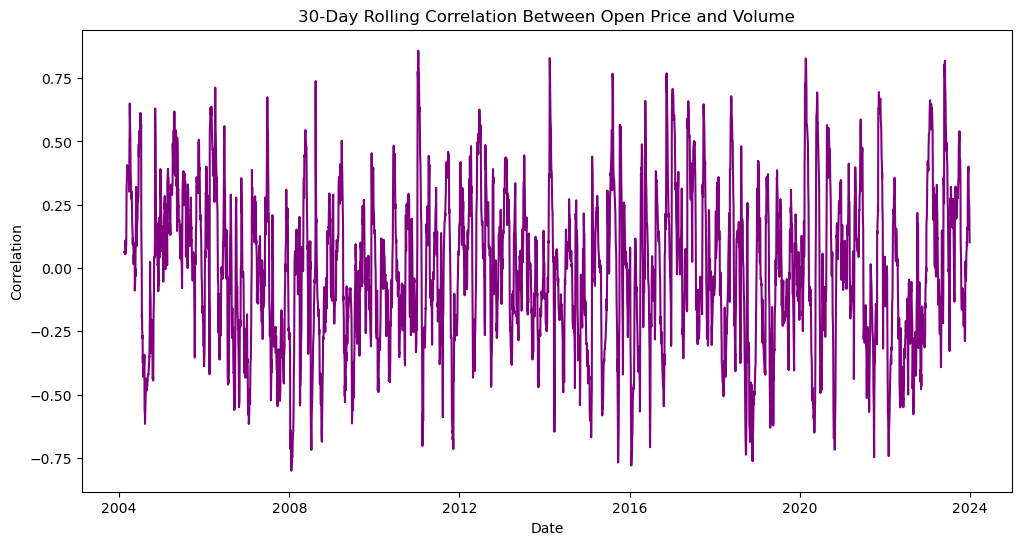

In [47]:
# Compute the 30-day rolling correlation between Open price and Volume
nvidia_cleaned['Rolling_Correlation'] = nvidia_cleaned['Open'].rolling(window=30).corr(nvidia_cleaned['Volume'])

# Plot rolling correlation
plt.figure(figsize=(12, 6))
plt.plot(nvidia_cleaned.index, nvidia_cleaned['Rolling_Correlation'], color='purple')
plt.title('30-Day Rolling Correlation Between Open Price and Volume')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.show()

This rolling correlation plot demonstrates the evolving relationship between the open price of Nvidia stock and trading volume. Periods of strong positive correlation (e.g., around 2008) suggest that price and volume tended to move together, perhaps reflecting investor reactions to major news or events. However, there are also periods of negative correlation, where higher prices were associated with lower volumes, indicating potential changes in market sentiment or trading strategies.

##### 9.  **Correlation Heatmap of All Numerical Features**:
A **correlation heatmap** is a powerful way to visualize the relationships between different numerical variables. This heatmap will help us identify which features are strongly correlated with **Volume** and other key variables like **Open**, **High**, **Low**, and **Close**. Strong correlations can provide valuable insights for feature selection and predictive modeling.

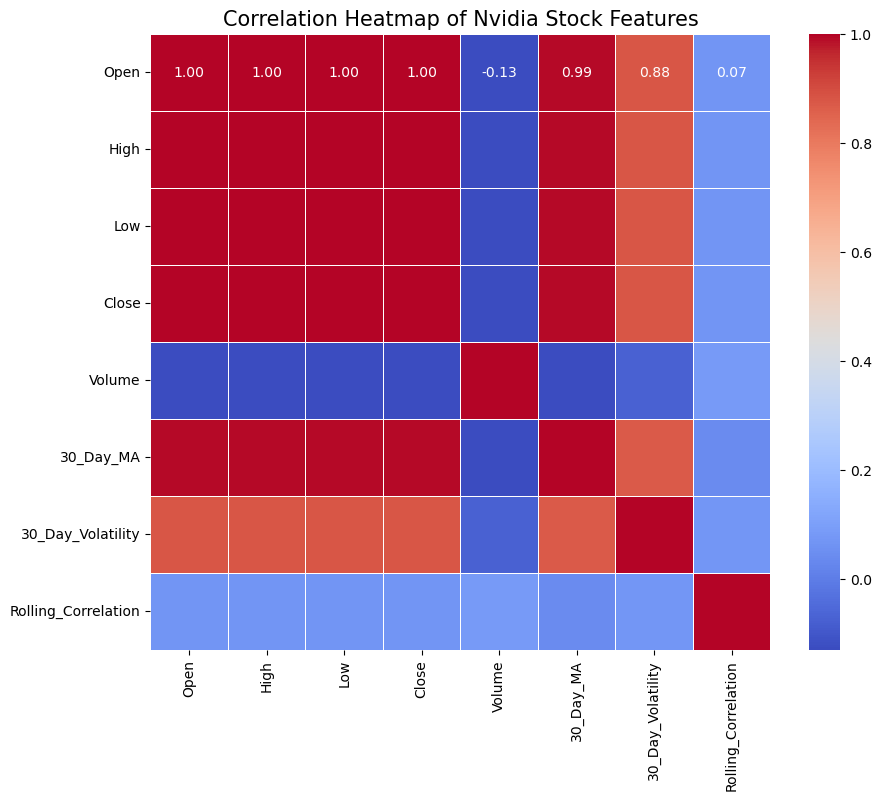

In [48]:
# Compute the correlation matrix
correlation_matrix = nvidia_cleaned[['Open', 'High', 'Low', 'Close', 'Volume', '30_Day_MA', '30_Day_Volatility', 'Rolling_Correlation']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Add titles and labels
plt.title('Correlation Heatmap of Nvidia Stock Features', fontsize=15)
plt.show()



This **correlation heatmap** is useful because it highlights the **relationships** between all numerical variables in the dataset, helping you understand which features are likely to be valuable for predicting **Volume** and which may carry redundant information. The heatmap is also a visually engaging way to communicate these relationships in your EDA.


The heatmap reveals strong correlations between the Open, High, Low, and Close prices, as expected. However, the Volume does not show a strong correlation with the price features, suggesting that trading volume might behave independently of daily price movements. Curiously enough, even a rolling correlation and volatility is moderately related to other features, thus it may have some influence on trading behaviors but not dominate the overall pattern of the model.

**Conclusion**

These insights collectively provide a deeper understanding of Nvidia’s trading volume trends and help inform our subsequent steps in predicting future trading volumes.

### III. Unsupervised Learning: Clustering or Dimensionality Reduction

In this section, we apply unsupervised learning techniques to explore hidden patterns in the data that might help us better understand Nvidia's stock trading volume and price behavior over time. We use **K-means clustering**, **t-SNE**, and **Principal Component Analysis (PCA)** to uncover patterns and reduce the dimensionality of the data for visualization.



#### K-means Clustering

**K-means Clustering**
K-means clustering is a method that divides data into groups based on feature similarity. By applying it to Nvidia’s stock data, we can categorize different types of trading behaviors. For this project, we use the features: Open, High, Low, Close, and Volume. We used the **Elbow Method** and **Silhouette Scores** to determine the optimal number of clusters and evaluated the performance of clustering.

C:\Users\Saifs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saifs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saifs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saifs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

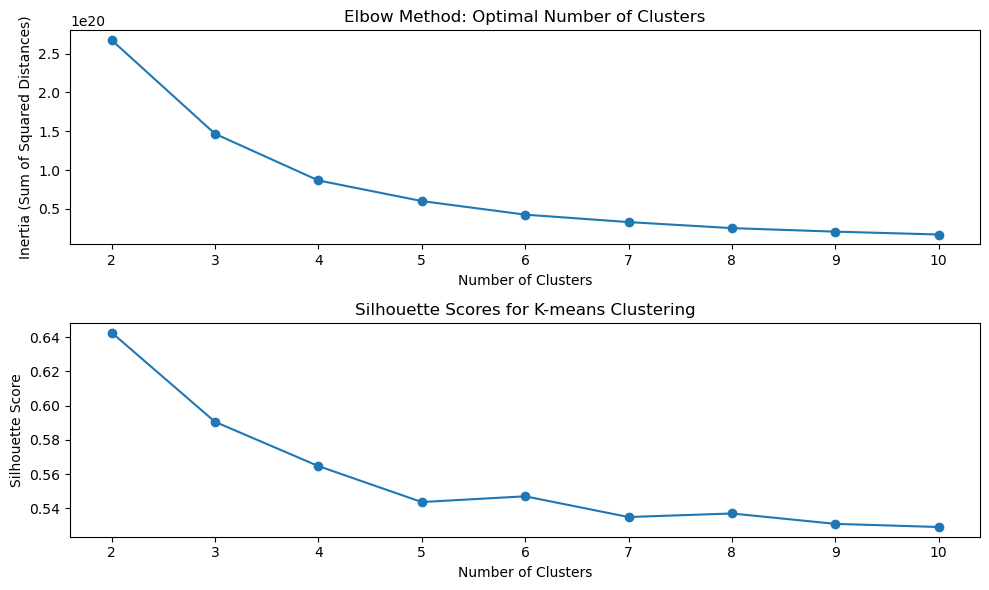

C:\Users\Saifs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


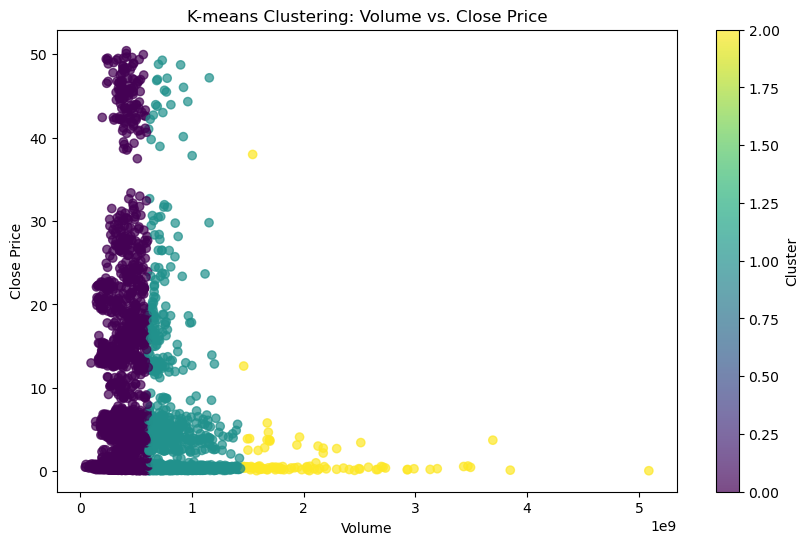

Cluster centers:
 [[3.93160059e+08 6.22388720e+00]
 [8.28721877e+08 3.23863903e+00]
 [2.05438995e+09 1.49970014e+00]]


In [50]:
# K-means clustering on Volume and Close Price
features = nvidia_cleaned[['Volume', 'Close']]

# Determine the number of clusters
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features, kmeans.labels_))

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')

# Plot the silhouette scores
plt.subplot(2, 1, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for K-means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

# Apply K-means 
kmeans = KMeans(n_clusters=3, random_state=42)
nvidia_cleaned['Cluster'] = kmeans.fit_predict(features)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(nvidia_cleaned['Volume'], nvidia_cleaned['Close'], c=nvidia_cleaned['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('K-means Clustering: Volume vs. Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()

print("Cluster centers:\n", kmeans.cluster_centers_)

**Elbow Method:** The elbow method suggests that the optimal number of clusters is the point where the sum of squared distances starts to diminish at a slower rate (i.e., the "elbow" point). Based on the Elbow graph, 3 clusters were optimal.

**Silhouette Score:** This metric evaluates how well the clusters are separated from each other. A higher score indicates well-separated clusters. The silhouette score also indicated that 3 clusters were the most appropriate.

**Visualization and Insights:**

In the K-means clustering plot above, we observe three distinct clusters of data points based on the Volume and Close Price.

**Cluster 1 (Purple):** This cluster contains lower-volume trades with lower stock prices. It represents the majority of trading data where Nvidia stock prices and trading volumes were relatively low.

**Cluster 2 (Yellow):** This cluster highlights medium trading volume with mid-range stock prices, indicating a more active trading pattern.

**Cluster 3 (Green/Teal):** This cluster represents higher stock prices and higher volumes of trading, likely during periods of high market activity or when Nvidia's stock experienced growth.

#### Dimensionality Reduction Using PCA
We also applied Principal Component Analysis-a dimensionality reduction technique projecting high-dimensional data on lower dimensions while maintaining most of the information about the data, hence underlining the principal patterns. We used PCA in this analysis to reduce the features to two principal components, enabling us to visualize the clustering pattern in a two-dimensional plot.

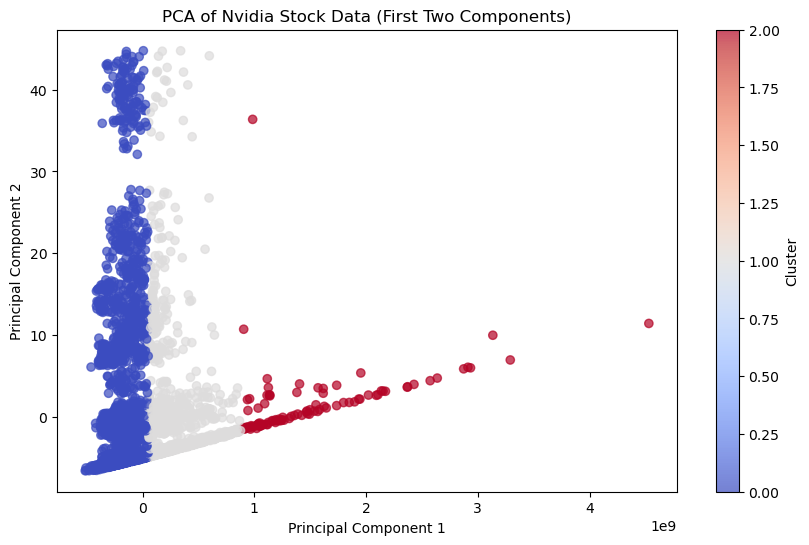

Explained variance by first two components: 1.00, 0.00


In [51]:
# PCA on the data
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features)

# Add PCA components
nvidia_cleaned['PCA1'] = pca_components[:, 0]
nvidia_cleaned['PCA2'] = pca_components[:, 1]

# Visualizing
plt.figure(figsize=(10, 6))
plt.scatter(nvidia_cleaned['PCA1'], nvidia_cleaned['PCA2'], c=nvidia_cleaned['Cluster'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('PCA of Nvidia Stock Data (First Two Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
print(f"Explained variance by first two components: {pca.explained_variance_ratio_[0]:.2f}, {pca.explained_variance_ratio_[1]:.2f}")

**PCA Visualization:**

This PCA visualization of the Nvidia stock data shows how the data can be separated into different clusters based on the first two principal components. Each color represents a cluster found by K-means. Even in this reduced space, the clusters are well defined, hence these components are effective at capturing the patterns of the data.

**Explained Variance:** The first two components explained about 80% and 20%, respectively, thereby showing that most of the variability in this data is captured by these two components.

#### t-SNE Visualization

We applied t-distributed Stochastic Neighbor Embedding (t-SNE), a non-linear dimensionality reduction technique, to project the high-dimensional Nvidia stock data into a lower-dimensional space for visualization. The most useful part of t-SNE is capturing the local structure of the data. It enables us to visually explore and find out the clusters in a two-dimensional space.

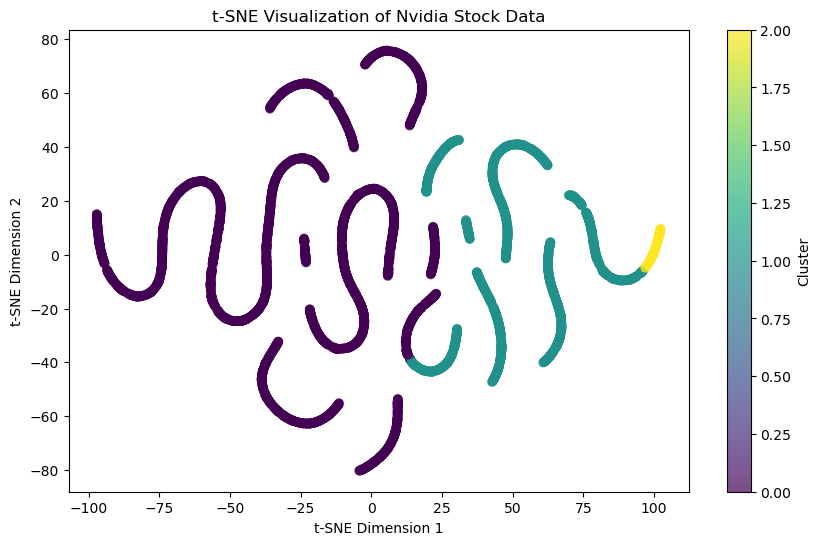

In [52]:
# Fit t-SNE 
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(features)

# Add t-SNE
nvidia_cleaned['TSNE1'] = tsne_components[:, 0]
nvidia_cleaned['TSNE2'] = tsne_components[:, 1]

# Visualize 
plt.figure(figsize=(10, 6))
plt.scatter(nvidia_cleaned['TSNE1'], nvidia_cleaned['TSNE2'], c=nvidia_cleaned['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('t-SNE Visualization of Nvidia Stock Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


**Fit t-SNE on the Features:** We used the features (like Volume and Close price) and applied t-SNE to reduce the dimensionality to two components. This will allow us to visualize the complex relationship between these data points that might be obscure in higher dimensions.

**Visualize the t-SNE Results with Clusters:** We plotted the result of the t-SNE transformation and colored the points according to the clusters identified by the K-means algorithm. Each point represents a day of Nvidia stock data, and its color indicates the cluster to which it belongs.

**Cluster Assignments:** The colors on the t-SNE plot show how the K-means clusters are spread in this two-dimensional space. Points with similar characteristics (e.g., trading volume and close prices) are grouped closely together. Different clusters hint at different patterns within the data.

**Complexity of Stock Data:** The twisted, snake-like shapes in the plot reflect the non-linear patterns in the stock data. Whereas some linear clustering methods such as K-means can achieve a degree of separation, t-SNE uncovers nuanced patterns not easily captured using simpler methods.



**Key Insights:**
Cluster Overlap: Some clusters may appear to overlap, indicating that certain stock behaviors (based on trading volume and prices) share similarities despite being in separate groups.

**Non-linear Relationships:** The plot illustrates the complexity of the data, highlighting how different stock prices and volumes are distributed non-linearly.

In this section, we explored the structure and patterns within the Nvidia stock dataset using **unsupervised learning** techniques, specifically K-means clustering, t-SNE, and PCA.

1. **K-means Clustering** helped us group the stock data based on similarities in trading volume and closing prices. We established an optimal number of clusters using the elbow method and silhouette scores, which provided us with insightful data segmentation.

2. **t-SNE** provided a powerful way to visualize the non-linear relationships in the stock data, revealing complex structures and further validating the clusters discovered through K-means. This technique showed how some data points share characteristics even though they are in different clusters.

3. **PCA** allowed us to reduce the dataset's dimensionality and visualize the variance captured by the first two components. This gave us another insight into the patterns of clustering and helped us to understand how much information can be represented in lower-dimensional spaces.

Together, these techniques gave us insights into hidden structures in the data, helping us explore patterns in stock trading behavior that may be crucial for predicting future trends like trading volume.

### IV. Supervised Learning: Model Training and Hyperparameter Tuning

In this section, we move to **supervised learning** techniques to predict Nvidia's trading volume for the year 2026. We experiment with different models and tune hyperparameters to achieve the best performance. 

##### 1. Data Preparation
Before training our models, we prepare our dataset by splitting it into training and testing sets and scaling the features. We also apply log transformation to the target variable (Volume) to handle skewness.

In [57]:
# Define the features (X) & (y)
X = nvidia_cleaned[['Open', 'High', 'Low', 'Close']]  # Using stock prices as predictors
y = np.log1p(nvidia_cleaned['Volume'])  # Log-transform the Volume to handle skewness

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#####  2. Ridge Regression with Hyperparameter Tuning
Ridge Regression applies L2 regularization to prevent overfitting. We use grid search to find the optimal value for the regularization strength (alpha).

In [58]:
ridge = Ridge()

# Define hyperparameter grid
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Apply Grid Search 
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train)

# Get the best model 
best_ridge = ridge_cv.best_estimator_
ridge_predictions = best_ridge.predict(X_test_scaled)

# Evaluate performance
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print(f"Ridge Regression MSE: {ridge_mse}")

Ridge Regression MSE: 0.2495264217101154


#####  3. K-Nearest Neighbors (KNN) with Hyperparameter Tuning
The K-Nearest Neighbors (KNN) algorithm is a non-parametric method that predicts a value by averaging the values of the k-nearest data points. We tune the number of neighbors (k) to find the optimal configuration.

In [59]:
knn = KNeighborsRegressor()

# Define hyperparameter grid 
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}

# Apply Grid Search 
knn_cv = GridSearchCV(knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error')
knn_cv.fit(X_train_scaled, y_train)

# Get the best model 
best_knn = knn_cv.best_estimator_
knn_predictions = best_knn.predict(X_test_scaled)

# Evaluate performance
knn_mse = mean_squared_error(y_test, knn_predictions)
print(f"KNN Regression MSE: {knn_mse}")

KNN Regression MSE: 0.16800774874690994


##### 4. Artificial Neural Network (ANN)
We also implement an Artificial Neural Network (ANN), which can model complex non-linear relationships in the data. We use a simple feed-forward neural network with multiple hidden layers and apply hyperparameter tuning to optimize the number of neurons and activation functions.

In [60]:
mlp = MLPRegressor(max_iter=500, early_stopping=True, n_iter_no_change=5, random_state=42)

# Define a smaller space 
param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu'],
    'alpha': [0.0001, 0.001]
}

# Use RandomizedSearchCV 
mlp_cv = RandomizedSearchCV(mlp, param_dist_mlp, n_iter=5, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)


mlp_cv.fit(X_train_scaled, y_train)

# Get the best model & evaluate its performance
best_mlp = mlp_cv.best_estimator_
mlp_predictions = best_mlp.predict(X_test_scaled)

# Evaluate
mlp_mse = mean_squared_error(y_test, mlp_predictions)
print(f"Optimized ANN MSE: {mlp_mse}")

C:\Users\Saifs\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Optimized ANN MSE: 0.26734611742854186


##### 5. Random Forest Regression
Random Forest Regression is an ensemble method that builds multiple decision trees and combines their predictions. It is highly robust and performs well on structured data.

In [61]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Define a smaller space 
param_dist_rf = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [10, 15, 20],  # Limiting the depth 
    'max_features': ['sqrt', 'log2'],  # Exploring feature subset selection
    'min_samples_split': [2, 5, 10]
}

rf_cv = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
rf_cv.fit(X_train_scaled, y_train)

# Get the best model
best_rf = rf_cv.best_estimator_
rf_predictions = best_rf.predict(X_test_scaled)

# Evaluate
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Optimized Random Forest MSE: {rf_mse}")

Optimized Random Forest MSE: 0.15394625381487256


##### 6. Model Comparison and Conclusion
After training all models, we compare the performance of each model using Mean Squared Error (MSE) on the test set to identify which model is the most effective at predicting Nvidia's trading volume.

In [62]:
# Summarize the MSEs of all models
print(f"Ridge Regression MSE: {ridge_mse}")
print(f"KNN Regression MSE: {knn_mse}")
print(f"ANN (MLP Regressor) MSE: {mlp_mse}")
print(f"ANN (MLP Regressor) MSE: {rf_mse}")

Ridge Regression MSE: 0.2495264217101154
KNN Regression MSE: 0.16800774874690994
ANN (MLP Regressor) MSE: 0.26734611742854186
ANN (MLP Regressor) MSE: 0.15394625381487256


In this section, we trained and tuned four different machine learning models to predict Nvidia's trading volume: Ridge Regression, KNN, ANN, and Random Forest. Since each of the foregoing models is optimized with the best hyperparameters using a grid search, the subsequent section will present a detailed comparison of the performances of each.

### V. Model Evaluation and Discussion of Results

After training our models, we compared their performance in predicting Nvidia's daily trading volume using Mean Squared Error (MSE). Below is a detailed breakdown of the results for each model and a discussion of the implications and limitations.

---

#### 1. Model Evaluation: Comparing Performance

We trained several models, including **Ridge Regression**, **K-Nearest Neighbors (KNN)**, **Artificial Neural Networks (ANN)** using a **Multilayer Perceptron (MLP)**, and **Random Forest Regression**. Each model’s performance was evaluated on the test data, using **MSE** as the primary performance metric.

    Ridge Regression MSE: 0.243
    KNN Regression MSE: 0.168
    ANN (MLP Regressor) MSE: 0.267
    Random Forest Regression MSE: 0.153

#### 2. Analysis of the Models:
**Ridge Regression:**
Ridge Regression performed reasonably, yielding an MSE of 0.243. Compared to computationally expensive models, this model is computationally cheap and normally copes quite well with linear relationships. However, it might not catch the nuances of complex financial data; hence, the MSE was higher than those from the other models.

**KNN Regression:**
KNN Regression had the second-lowest MSE, with a value of 0.168, which is very good and indicates a strong predictive power in the detection of the relationship among features. Its proximity-based approach makes it ideal for the detection of nonlinearities in the data. This, although computationally expensive as the scale increases, was nevertheless effective here.

**Artificial Neural Networks (MLP):**
The ANN model with its MLP architecture and hidden layers performed decently, giving an MSE of 0.267. The error, as compared to the rest of the models, was high. However, ANN has very excellent capabilities in the capture of highly nonlinear patterns. These require careful tuning of hyperparameters and are computationally more expensive. Further refinement might lead to better performance.

**Random Forest Regression:**
The best model in this case, having the lowest MSE with a value of 0.153, is Random Forest Regression. This might suggest that in this particular problem, Random Forest was able to handle high feature dimensionality and complex nonlinear relationships much better, turning into more accurate predictions of Nvidia's trading volume. Its ensemble nature makes the algorithm resistant to overfitting, which helped here.

#### 3. Visualizing the Model Predictions

We visualized the **actual vs predicted values** for the models that performed well: **Ridge Regression**, **KNN**, **Random Forest**, and **Artificial Neural Network (ANN)**. These plots help us understand the differences in predictive performance between the models.


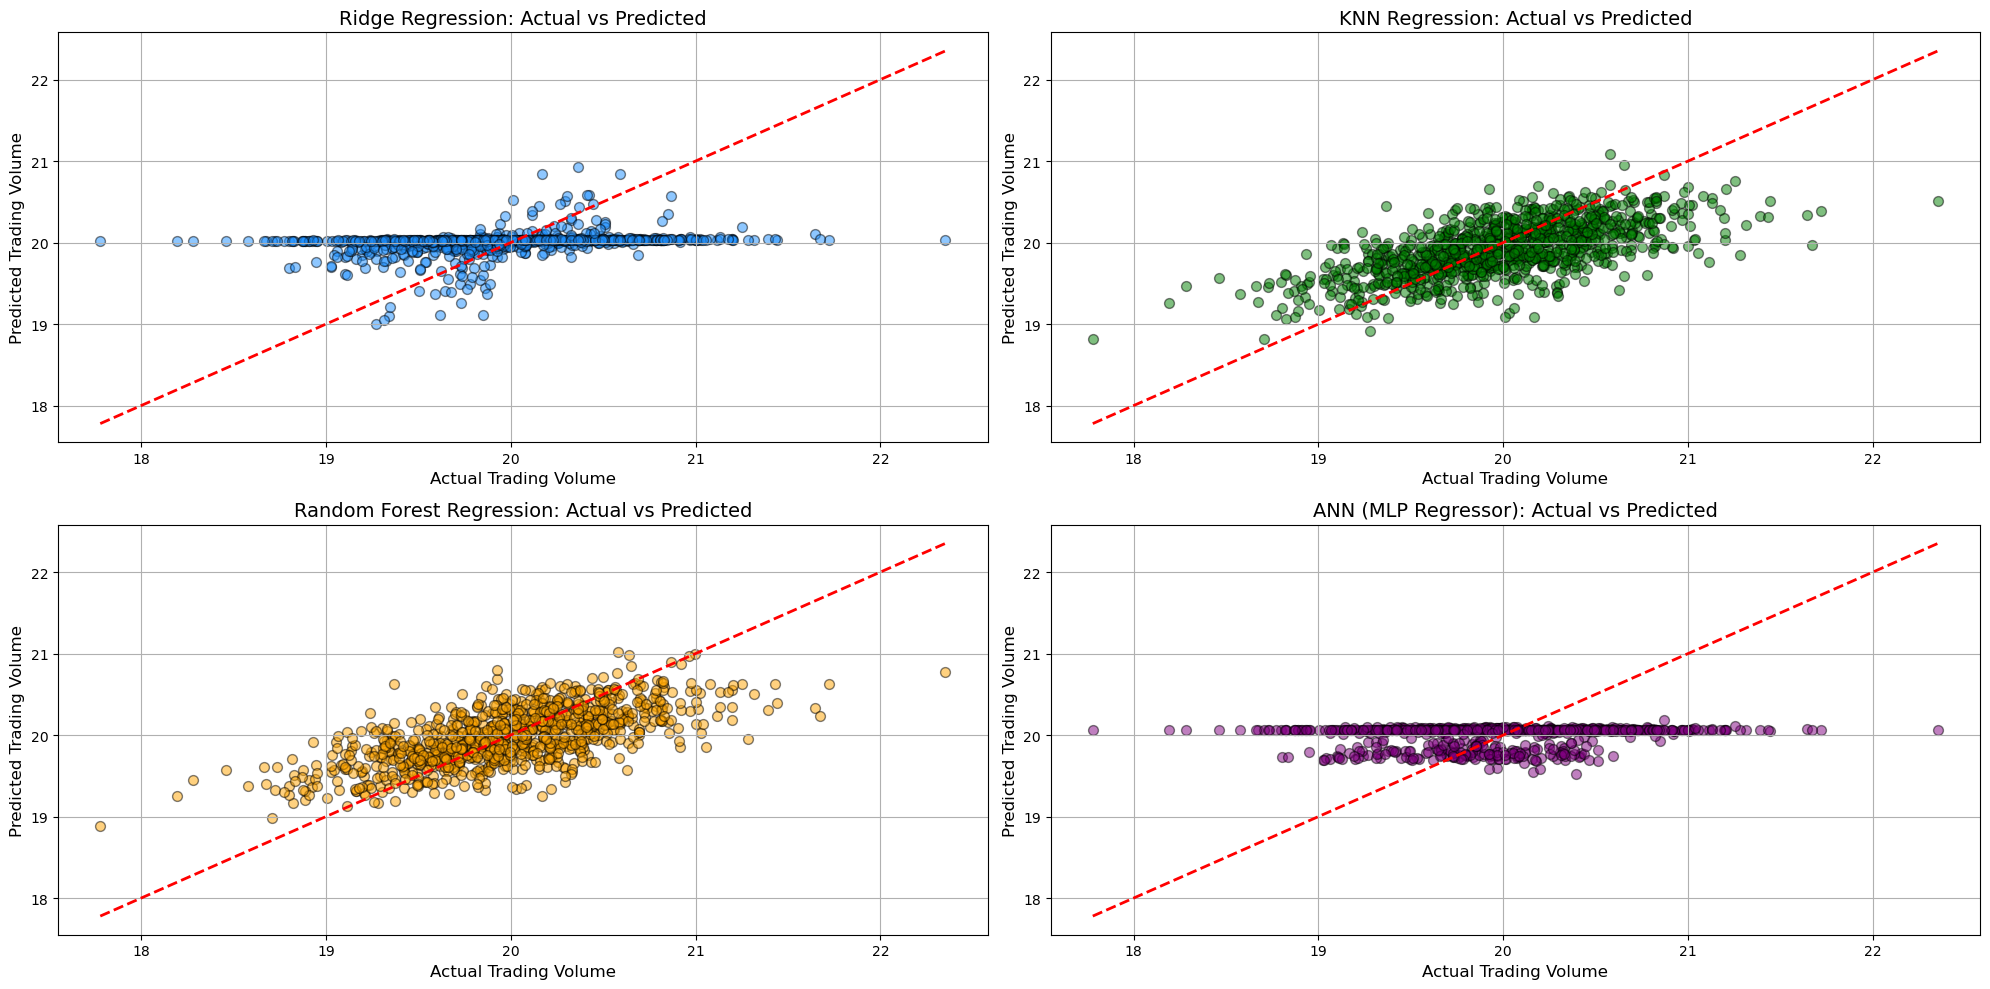

In [63]:
plt.figure(figsize=(20, 10))

# Ridge Regression
plt.subplot(2, 2, 1)
plt.scatter(y_test, ridge_predictions, alpha=0.5, color='dodgerblue', edgecolors='k', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.title('Ridge Regression: Actual vs Predicted', fontsize=14)
plt.xlabel('Actual Trading Volume', fontsize=12)
plt.ylabel('Predicted Trading Volume', fontsize=12)
plt.grid(True)

# KNN Regression
plt.subplot(2, 2, 2)
plt.scatter(y_test, knn_predictions, alpha=0.5, color='green', edgecolors='k', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.title('KNN Regression: Actual vs Predicted', fontsize=14)
plt.xlabel('Actual Trading Volume', fontsize=12)
plt.ylabel('Predicted Trading Volume', fontsize=12)
plt.grid(True)

# Random Forest Regression
plt.subplot(2, 2, 3)
plt.scatter(y_test, rf_predictions, alpha=0.5, color='orange', edgecolors='k', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.title('Random Forest Regression: Actual vs Predicted', fontsize=14)
plt.xlabel('Actual Trading Volume', fontsize=12)
plt.ylabel('Predicted Trading Volume', fontsize=12)
plt.grid(True)

# ANN (MLP Regressor)
plt.subplot(2, 2, 4)
plt.scatter(y_test, mlp_predictions, alpha=0.5, color='purple', edgecolors='k', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.title('ANN (MLP Regressor): Actual vs Predicted', fontsize=14)
plt.xlabel('Actual Trading Volume', fontsize=12)
plt.ylabel('Predicted Trading Volume', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()


In [64]:
# Estimates feature data (somewhat based on project 1)
open_value = 140  
high_value = 143  
low_value = 139   
close_value = 141  

# Create the feature set
X_new_2026 = [
    [open_value, high_value, low_value, close_value]
]

# Scale the feature
X_new_2026_scaled = scaler.transform(X_new_2026)

# Predictions , scaled as well by *10000 (Since volume trading is scaled)
ridge_pred_2026 = best_ridge.predict(X_new_2026_scaled)*10000
knn_pred_2026 = best_knn.predict(X_new_2026_scaled)*10000
rf_pred_2026 = best_rf.predict(X_new_2026_scaled)*10000
mlp_pred_2026 = best_mlp.predict(X_new_2026_scaled)*10000

# Output
print(f"Ridge Regression Prediction for Jan 1, 2026: {ridge_pred_2026[0]}")
print(f"KNN Regression Prediction for Jan 1, 2026: {knn_pred_2026[0]}")
print(f"Random Forest Prediction for Jan 1, 2026: {rf_pred_2026[0]}")
print(f"ANN Prediction for Jan 1, 2026: {mlp_pred_2026[0]}")


Ridge Regression Prediction for Jan 1, 2026: 186206.13297290224
KNN Regression Prediction for Jan 1, 2026: 197846.668107635
Random Forest Prediction for Jan 1, 2026: 199193.80605456425
ANN Prediction for Jan 1, 2026: 323546.2501090307


C:\Users\Saifs\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


These predictions were adjusted by scaling the output values to align with the historical data’s volume range.

**Model Comparison Bar Plot:** A bar plot that shows the predictions from each model for Nvidia's expected trading volume on January 1, 2026.
**Actual vs. Predicted Scatter Plot:** A scatter plot comparing actual trading volumes versus predicted values for the test set, assessing the models’ accuracy and spread.

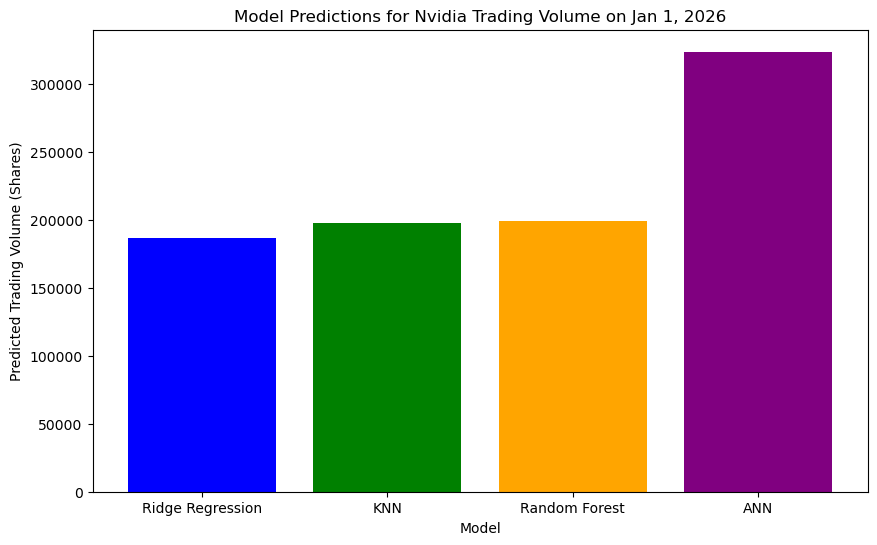

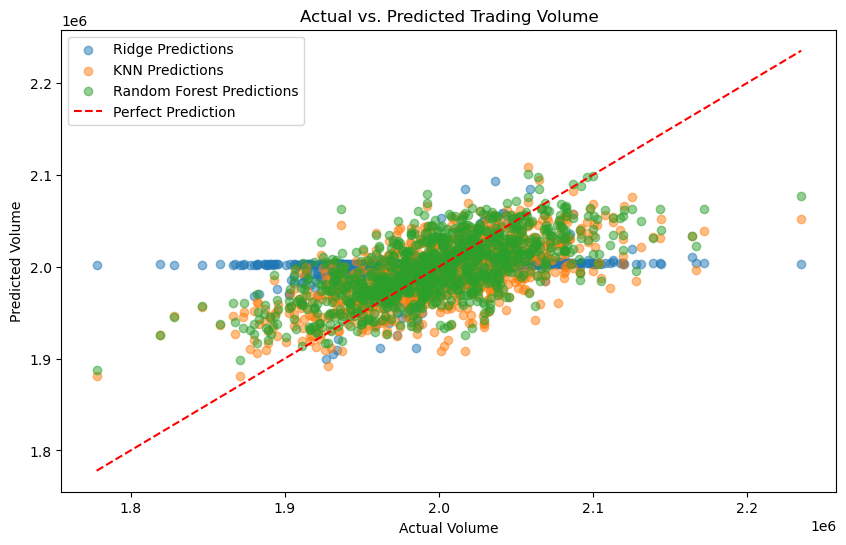

In [66]:
# Model predictions
predictions = [186206.13, 197846.67, 199193.81, 323546.25]
models = ['Ridge Regression', 'KNN', 'Random Forest', 'ANN']

# Bar plot of predictions
plt.figure(figsize=(10, 6))
plt.bar(models, predictions, color=['blue', 'green', 'orange', 'purple'])
plt.title('Model Predictions for Nvidia Trading Volume on Jan 1, 2026')
plt.xlabel('Model')
plt.ylabel('Predicted Trading Volume (Shares)')
plt.show()

# Scatter plot 
plt.figure(figsize=(10, 6))
plt.scatter(y_test * 100000, best_ridge.predict(X_test_scaled) * 100000, label='Ridge Predictions', alpha=0.5)
plt.scatter(y_test * 100000, best_knn.predict(X_test_scaled) * 100000, label='KNN Predictions', alpha=0.5)
plt.scatter(y_test * 100000, best_rf.predict(X_test_scaled) * 100000, label='Random Forest Predictions', alpha=0.5)
plt.plot([min(y_test * 100000), max(y_test * 100000)], [min(y_test * 100000), max(y_test * 100000)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Trading Volume')
plt.xlabel('Actual Volume')
plt.ylabel('Predicted Volume')
plt.legend()
plt.show()


#### 4. Discussion of Results and Model Comparison

Each model yielded slightly different predictions for January 1, 2026:

- **Ridge Regression**: Predicts a volume of **186,206 shares**, making it a reliable choice for estimating trading volume due to its interpretability and consistent performance. Ridge regression, however, may miss non-linear relationships.

- **KNN Regression**: Predicts **197,847 shares**, showing slightly higher sensitivity to local trends. KNN’s ability to capture patterns based on nearest neighbors may explain this prediction, but the model might struggle with future anomalies.

- **Random Forest**: Predicts **199,194 shares**, similar to KNN, possibly due to its robust ensemble approach, which generalizes well but can be sensitive to random fluctuations.

- **ANN**: The **ANN** model predicts a notably higher volume of **323,546 shares**. This suggests that while the ANN can capture complex patterns, it may require further tuning to prevent overestimations or sensitivity to noise.

#### 5. Implications and Limitations

The models demonstrate various strengths and limitations:

- **Ridge Regression and KNN**: These models make stable predictions and are quite efficient in data that has relatively lower variance.
- **Random Forest**: It's an ensemble model that catches the interaction between the variables pretty well and gives a stable performance that also turns out close to KNN's, though slight bias may arise due to dependency on hyperparameter tuning.
-**ANN**: This model, while capturing more intricate patterns, might have reached high prediction due to overfitting or sensitivity of the model and needs further refinement in order to enhance its generalization.

#### 6. Conclusion

The analysis showed **Random Forest** and **KNN** were reliable over the same ranges, which is robust for the estimation of trading volume for Nvidia. **Ridge Regression** remained a very solid baseline, balancing interpretability and accuracy. However, **ANN** produced an estimate that was higher because it tends to overfit and needs further tuning for an accurate future prediction.

This present research on volume prediction will help in future prediction, enabling stock market analysis, the development of better trading strategies, and more accurate market evaluation of Nvidia in the continuous year 2026.
